In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mean_squared_error

НАЛОЖЕНИЕ И УДАЛЕНИЕ ШУМА

In [4]:
image = cv2.imread('img.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

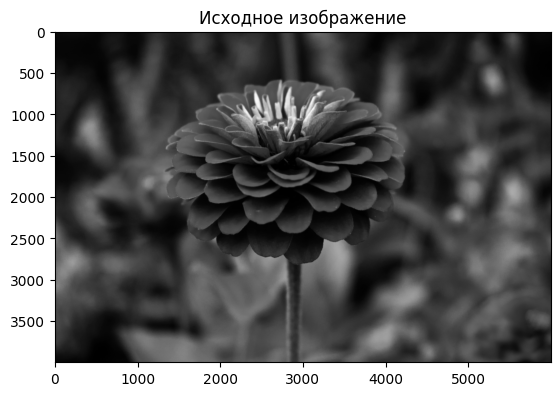

In [5]:
plt.imshow(image_gray, cmap="gray")
plt.title("Исходное изображение")
plt.show()

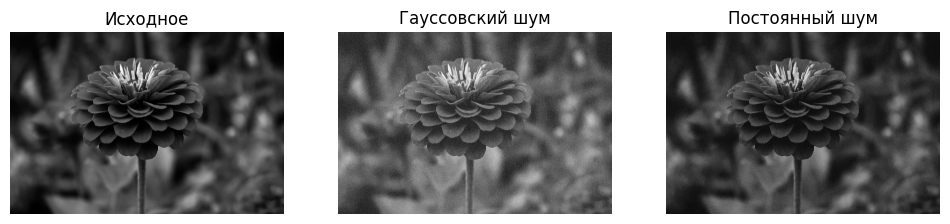

In [6]:
#   --ГАУСОВ ШУМ--
def gaussian_noise(img, mean=0, stddev=100):
    noise_gauss = np.zeros(img.shape, np.uint8)
    cv2.randn(noise_gauss, mean, stddev)
    noisy = cv2.add(img, noise_gauss)
    return noisy
    
#   --РАВНОМЕРНЫЙ ШУМ--
def uniform_noise(img, low=-60, high=60):
    uniform = np.random.uniform(low, high, img.shape)
    noisy = img.astype(np.float32) + uniform
    noisy = np.clip(noisy, 0, 255).astype(np.uint8)
    return noisy

#   --ИСПОЛЬЗУЕМ ШУМЫ--
gaussian_noisy = gaussian_noise(image_gray)
uniform_noisy =uniform_noise(image_gray)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1), plt.imshow(image_gray, cmap='gray'), plt.title("Исходное"), plt.axis('off')
plt.subplot(1,3,2), plt.imshow(gaussian_noisy, cmap='gray'), plt.title("Гауссовский шум"), plt.axis('off')
plt.subplot(1,3,3), plt.imshow(uniform_noisy, cmap='gray'), plt.title("Постоянный шум"), plt.axis('off')
plt.show()

In [7]:
def evaluate_metrics(original, filtered):
    mse_val = mean_squared_error(original, filtered)
    ssim_val = ssim(original, filtered, data_range=255)
    return mse_val, ssim_val

МЕДИАННЫЙ  ФИЛЬТР

In [29]:
def test_median_filters(original, noisy_img, kernel_sizes=[3,5,7]):
    results = []

    for k in kernel_sizes:
        filtered = cv2.medianBlur(noisy_img, k)
        mse_val, ssim_val = evaluate_metrics(original, filtered)
        results.append((k, mse_val, ssim_val))

        plt.figure(figsize=(10,4))
        plt.subplot(1,3,1)
        plt.imshow(original, cmap='gray')
        plt.title("Оригинал")
        plt.axis('off')

        plt.subplot(1,3,2)
        plt.imshow(noisy_img, cmap='gray')
        plt.title("Шум")
        plt.axis('off')

        plt.subplot(1,3,3)
        plt.imshow(filtered, cmap='gray')
        plt.title(f"Median {k}x{k}\nMSE:{mse_val:.1f} SSIM:{ssim_val:.3f}")
        plt.axis('off')
        plt.show()

    return results

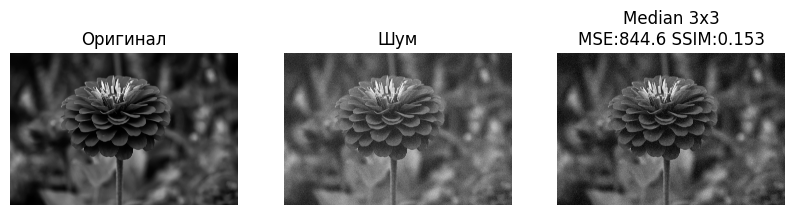

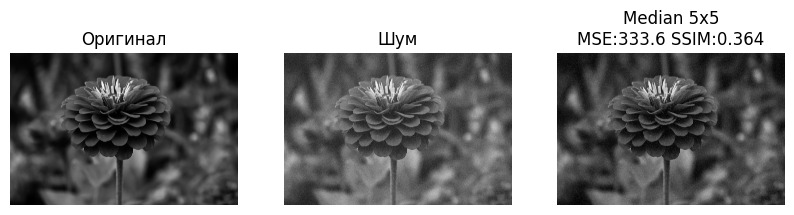

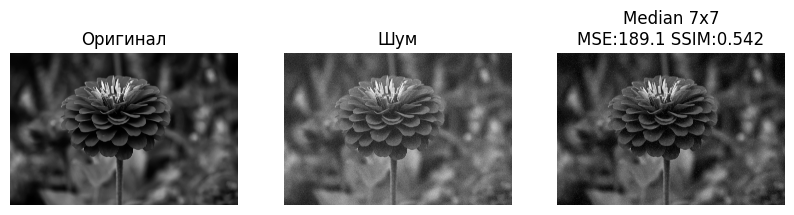

In [10]:
#   --ДЛЯ ШУМА ГАУСА--
median_results_gauss = test_median_filters(image_gray, gaussian_noisy)

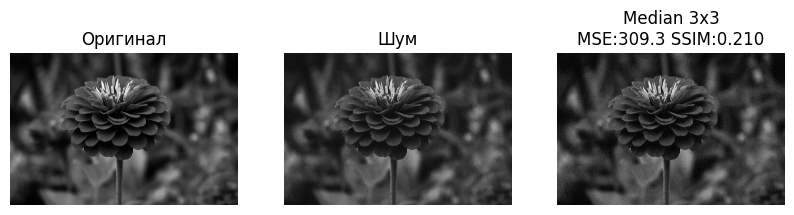

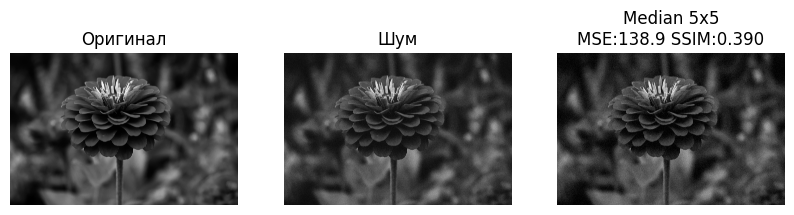

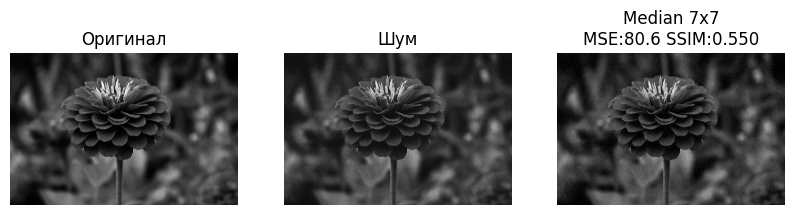

In [12]:
#   --ДЛЯ РАВНОМЕРНОГО ШУМА--
median_results_uniform = test_median_filters(image_gray, uniform_noisy)

ФИЛЬТР ГАУСА

In [30]:
def test_gaussian_filters(original, noisy_img, kernel_sizes=[3,5,7]):
    results = []

    for k in kernel_sizes:
        filtered = cv2.GaussianBlur(noisy_img, (k, k), 0)
        mse_val, ssim_val = evaluate_metrics(original, filtered)
        results.append((k, mse_val, ssim_val))

        plt.figure(figsize=(10,4))
        plt.subplot(1,3,1)
        plt.imshow(original, cmap='gray')
        plt.title("Оригинал")
        plt.axis('off')

        plt.subplot(1,3,2)
        plt.imshow(noisy_img, cmap='gray')
        plt.title("Шум")
        plt.axis('off')

        plt.subplot(1,3,3)
        plt.imshow(filtered, cmap='gray')
        plt.title(f"Gaussian {k}x{k}\nMSE:{mse_val:.1f} SSIM:{ssim_val:.3f}")
        plt.axis('off')
        plt.show()

    return results

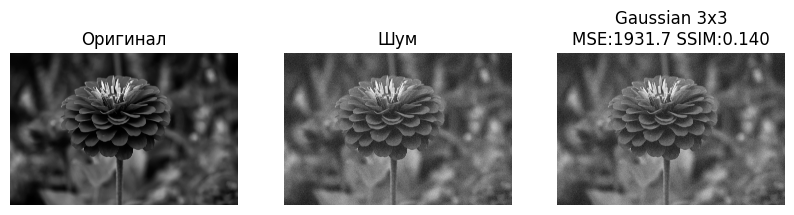

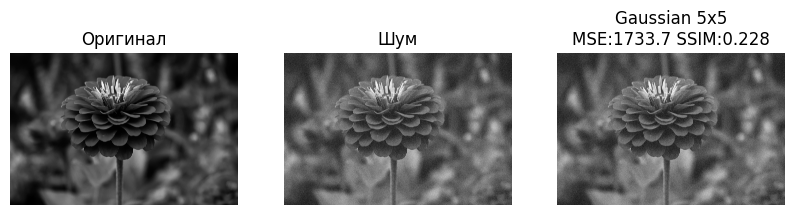

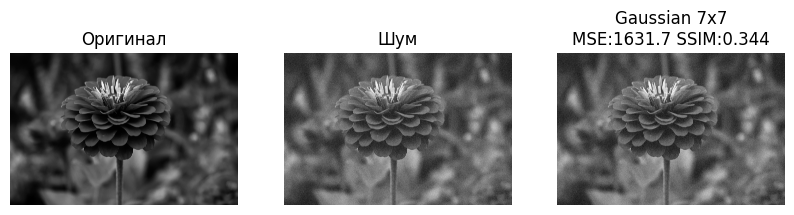

In [27]:
gaussian_results_gauss = test_gaussian_filters(image_gray, gaussian_noisy)

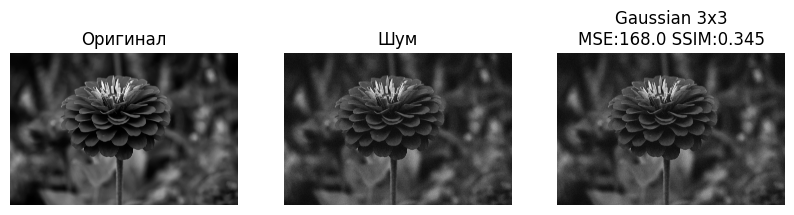

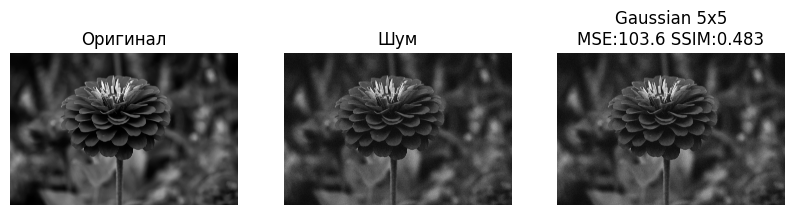

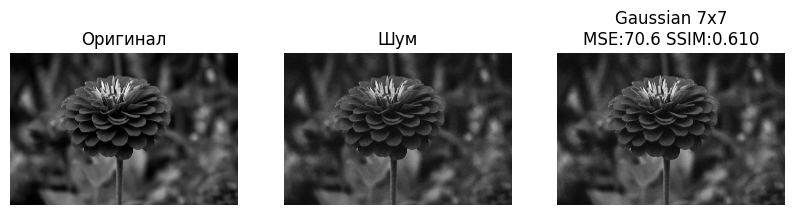

In [26]:
gaussian_results_uniform = test_gaussian_filters(image_gray, uniform_noisy)

БИЛАТЕРИАЛЬНЫЙ ФИЛЬТР

In [31]:
def test_bilateral_filters(original, noisy_img, diameters=[5, 9, 15], sigmaColor=75, sigmaSpace=75):
    results = []

    for d in diameters:
        filtered = cv2.bilateralFilter(noisy_img, d, sigmaColor, sigmaSpace)
        mse_val, ssim_val = evaluate_metrics(original, filtered)
        results.append((d, mse_val, ssim_val))

        plt.figure(figsize=(10,4))
        plt.subplot(1,3,1)
        plt.imshow(original, cmap='gray')
        plt.title("Оригинал")
        plt.axis('off')

        plt.subplot(1,3,2)
        plt.imshow(noisy_img, cmap='gray')
        plt.title("Шум")
        plt.axis('off')

        plt.subplot(1,3,3)
        plt.imshow(filtered, cmap='gray')
        plt.title(f"Bilateral d={d}\nMSE:{mse_val:.1f} SSIM:{ssim_val:.3f}")
        plt.axis('off')
        plt.show()

    return results

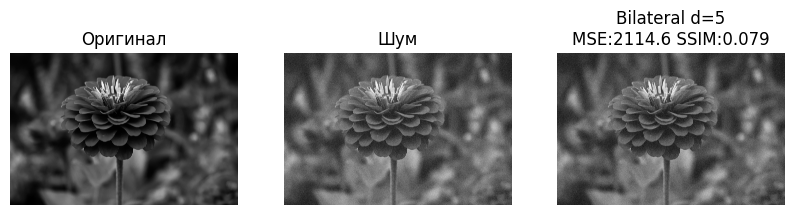

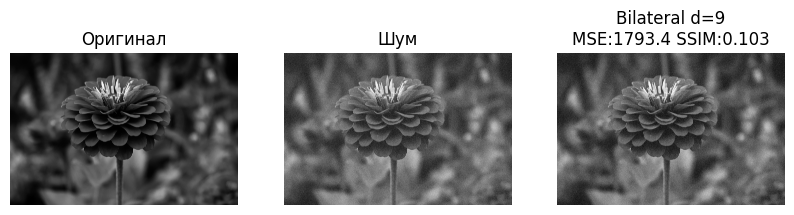

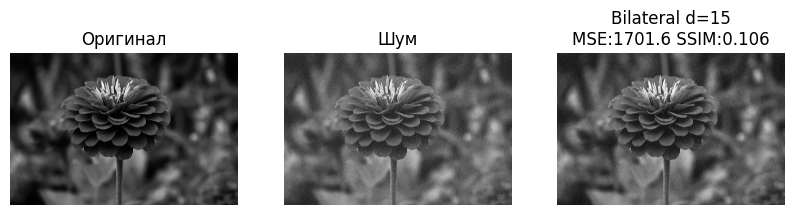

In [25]:
bilateral_results_gauss = test_bilateral_filters(image_gray, gaussian_noisy)

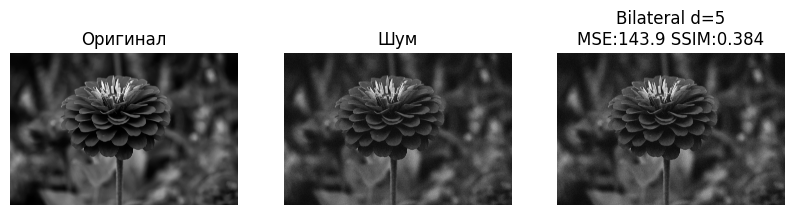

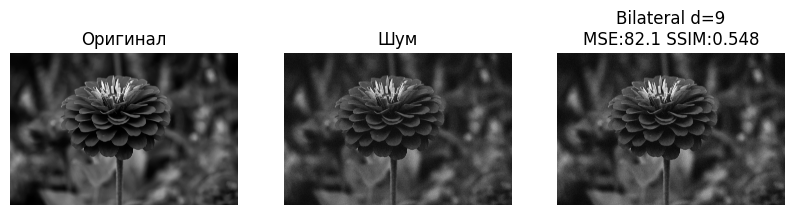

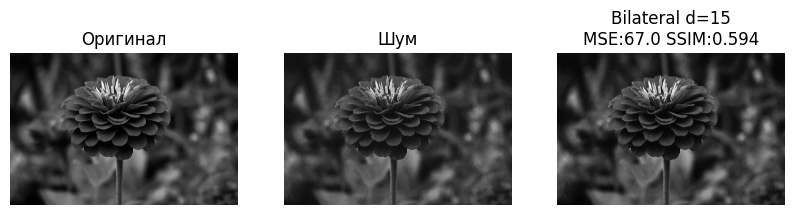

In [24]:
bilateral_results_uniform = test_bilateral_filters(image_gray, uniform_noisy)

ФИЛЬТР НЕЛОКАЛЬНЫХ СРЕДНИХ

In [32]:
def test_nlm_filters(original, noisy_img, h_values=[5, 10, 20], templateWindowSize=7, searchWindowSize=21):
    results = []

    for h in h_values:
        filtered = cv2.fastNlMeansDenoising(noisy_img, None, h, templateWindowSize, searchWindowSize)
        mse_val, ssim_val = evaluate_metrics(original, filtered)
        results.append((h, mse_val, ssim_val))

        plt.figure(figsize=(10,4))
        plt.subplot(1,3,1)
        plt.imshow(original, cmap='gray')
        plt.title("Оригинал")
        plt.axis('off')

        plt.subplot(1,3,2)
        plt.imshow(noisy_img, cmap='gray')
        plt.title("Шум")
        plt.axis('off')

        plt.subplot(1,3,3)
        plt.imshow(filtered, cmap='gray')
        plt.title(f"NLM h={h}\nMSE:{mse_val:.1f} SSIM:{ssim_val:.3f}")
        plt.axis('off')
        plt.show()

    return results

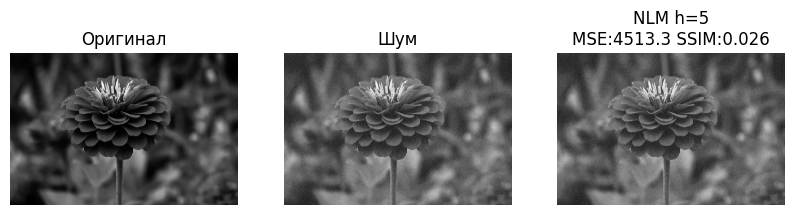

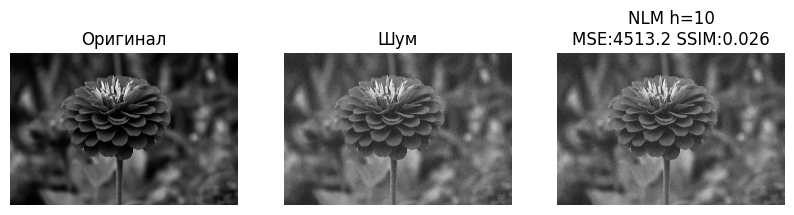

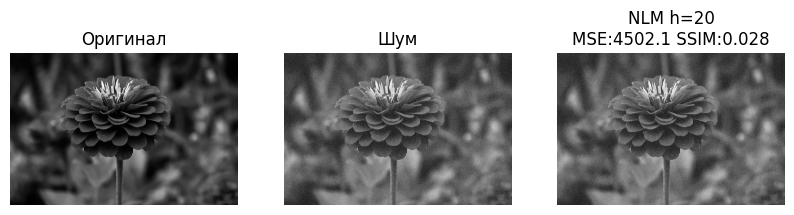

In [23]:
nlm_results_gauss = test_nlm_filters(image_gray, gaussian_noisy)

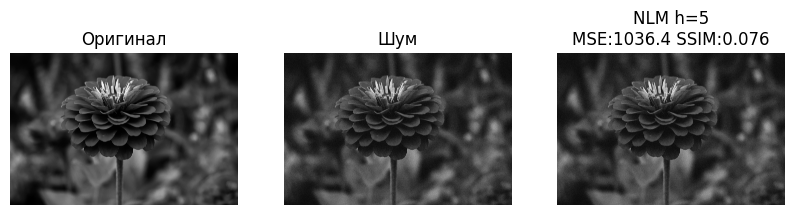

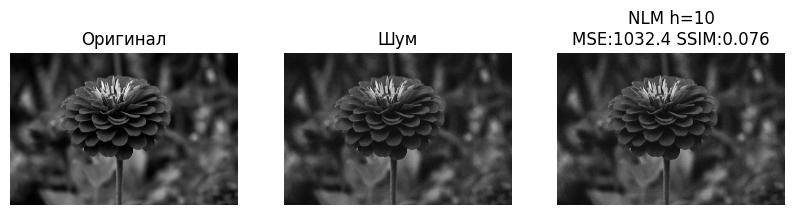

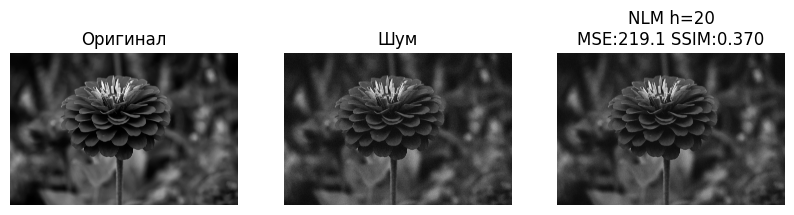

In [22]:
nlm_results_uniform = test_nlm_filters(image_gray, uniform_noisy)

=== ИТОГОВЫЕ РЕЗУЛЬТАТЫ ===

Для ГАУССОВСКОГО шума:
Лучший фильтр: Median k=7
SSIM = 0.542
MSE  = 189.1

Для ПОСТОЯННОГО шума:
Лучший фильтр: Gaussian k=7
SSIM = 0.610
MSE  = 70.60
 